## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 013

## Part A - Load Libraries

In [1]:
import os
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
%matplotlib inline

## Part B - Load Digits

In [2]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 15

In [3]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [4]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

## Part C - Scale and visualize the embedding vectors

In [5]:
def plot_embedding(X, imgNr, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig=plt.figure(figsize=(9, 9))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
    print(imagepath)
    if not os.path.exists(imagepath):
        os.makedirs(imagepath)
    imgfile='Chapter-004-Example-013-' + imgNr + '.jpg'
    imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',imgfile])
    fig.savefig(imagename, bbox_inches='tight')

## Part D - Plot images of the digits

In [6]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


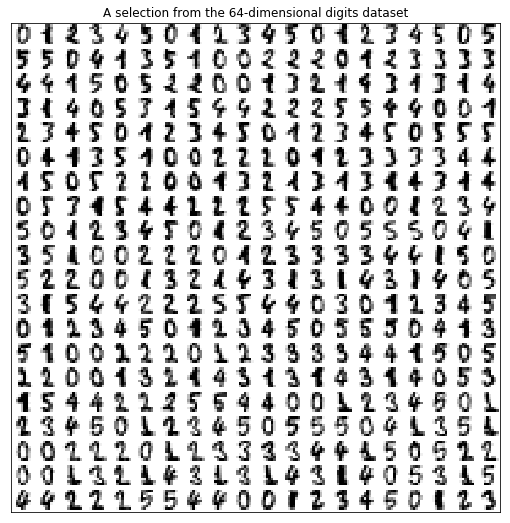

In [7]:
fig = plt.figure(1, figsize=(9, 9))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imgfile='Chapter-004-Example-013-00.jpg'
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',imgfile])
fig.savefig(imagename, bbox_inches='tight')

## Part E - Random 2D projection using a random unitary matrix

Computing random projection
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


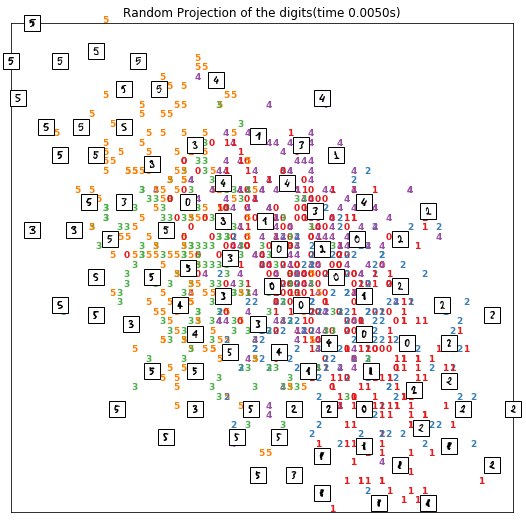

In [8]:
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=321)
t0 = time()
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, '01', "Random Projection of the digits(time %0.4fs)" % (time() - t0))

## Part F - SVD Projection on to the first 2 principal components

Computing Truncated SVD projection
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


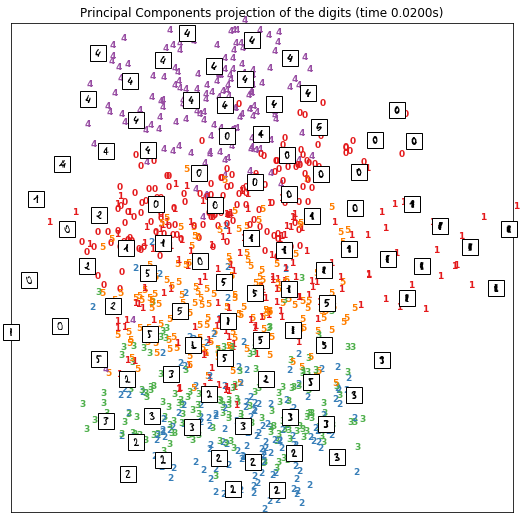

In [9]:
print("Computing Truncated SVD projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, '02',
               "Principal Components projection of the digits (time %0.4fs)" % (time() - t0))

## Part G - Linear Discriminant Projection on to the first 2 linear discriminant components

Computing Linear Discriminant Analysis projection
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


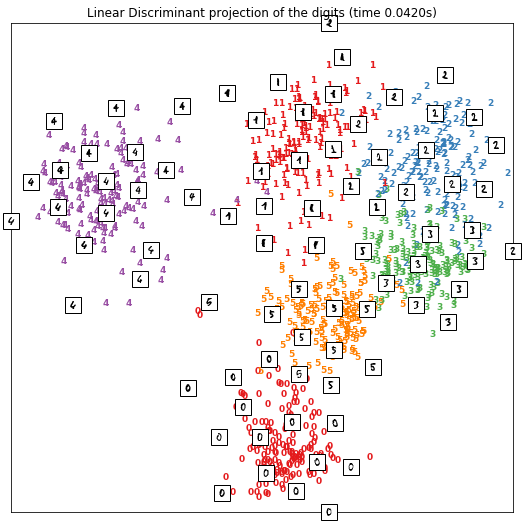

In [10]:
print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
lda=discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X2, y)
plot_embedding(X_lda, '03', "Linear Discriminant projection of the digits (time %0.4fs)" % (time() - t0))

## Part H - Isomap projection of the digits dataset

Computing Isomap embedding
Done.
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


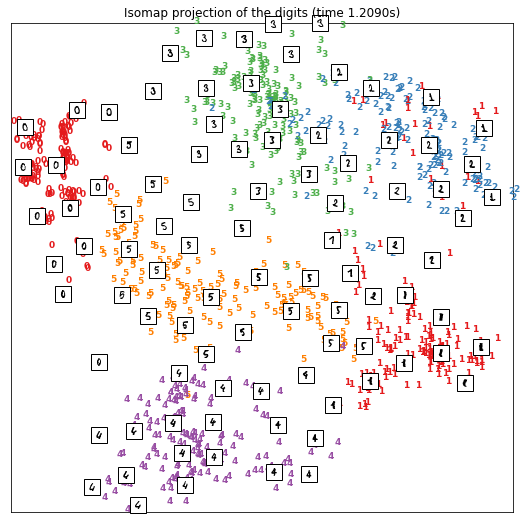

In [11]:
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso, '04',
               "Isomap projection of the digits (time %0.4fs)" % (time() - t0))

## Part K - Locally linear embedding of the digits dataset

Computing LLE embedding
Done. Reconstruction error: 5.44954e-07
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


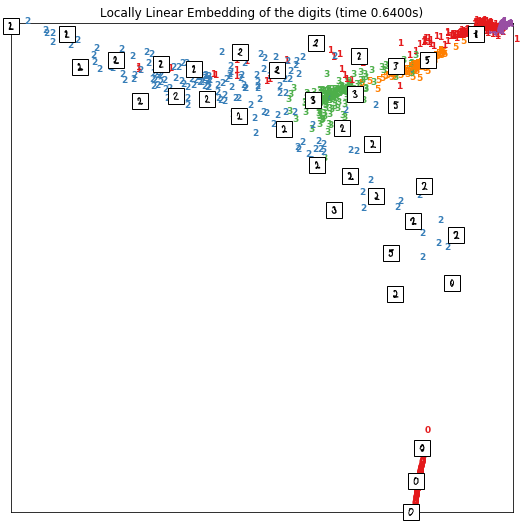

In [12]:
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='standard', eigen_solver='auto')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle, '05',
               "Locally Linear Embedding of the digits (time %0.4fs)" % (time() - t0))

## Part L - Modified Locally linear embedding of the digits dataset

Computing modified LLE embedding
Done. Reconstruction error: 0.0591368
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


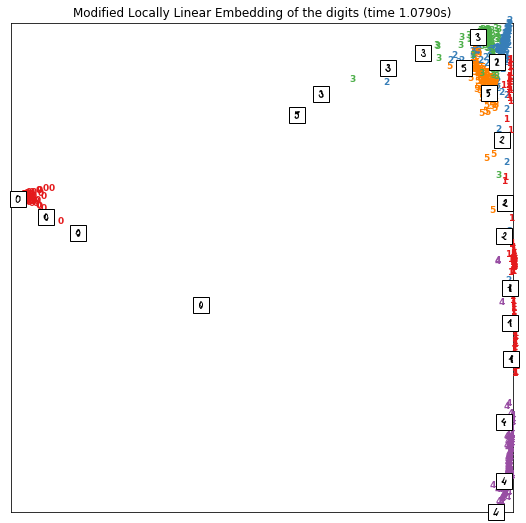

In [13]:
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='modified', eigen_solver='auto')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle, '06',
               "Modified Locally Linear Embedding of the digits (time %0.4fs)" % (time() - t0))

## Part M - HLLE embedding of the digits dataset

Computing Hessian LLE embedding
Done. Reconstruction error: -1.88117e-15
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


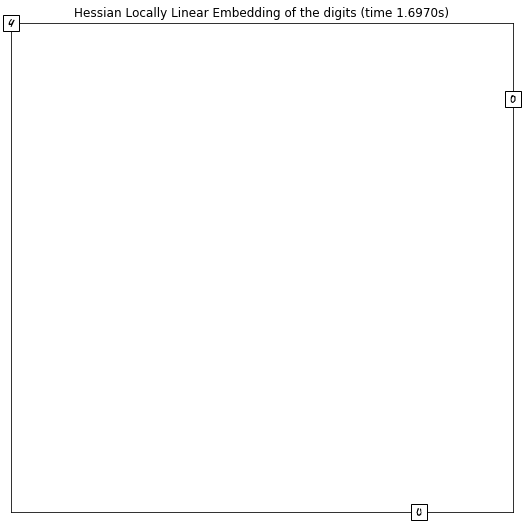

In [14]:
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='hessian', eigen_solver='dense')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle, '07',
               "Hessian Locally Linear Embedding of the digits (time %0.4fs)" % (time() - t0))

## Part N - LTSA embedding of the digits dataset

Computing LTSA embedding
Done. Reconstruction error: 7.10743e-15
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


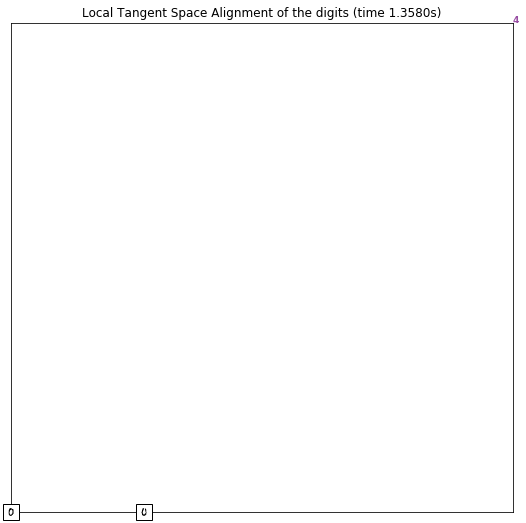

In [15]:
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='ltsa', eigen_solver='dense')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa, '08',
               "Local Tangent Space Alignment of the digits (time %0.4fs)" % (time() - t0))



## Part O - MDS  embedding of the digits dataset

Computing MDS embedding
Done. Stress: 165310102.413926
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


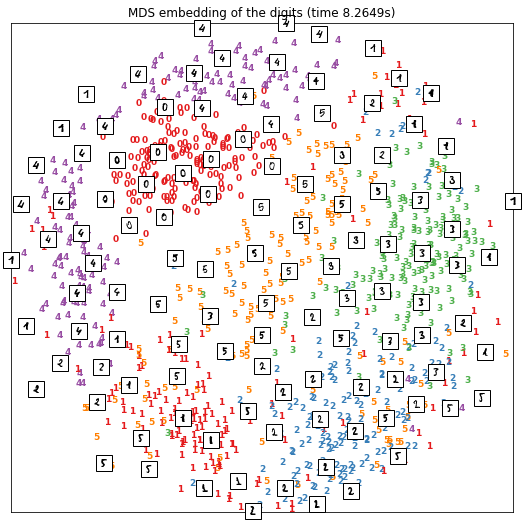

In [16]:
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, '09',
               "MDS embedding of the digits (time %0.4fs)" % (time() - t0))

## Part P - Random Trees embedding of the digits dataset

Computing Totally Random Trees embedding
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


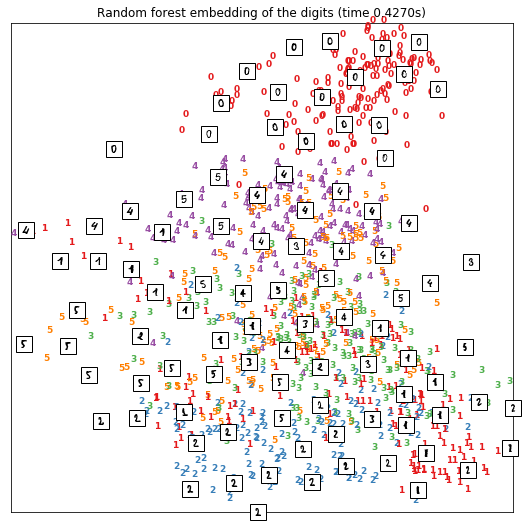

In [17]:
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, '10',"Random forest embedding of the digits (time %0.4fs)" % (time() - t0))

In [22]:
print(hasher.decision_path(X2))

(<1083x9498 sparse matrix of type '<class 'numpy.int64'>'
	with 1298605 stored elements in Compressed Sparse Row format>, array([   0,   49,  106,  163,  194,  233,  286,  347,  374,  425,  462,
        515,  570,  607,  638,  687,  718,  777,  838,  885,  942,  989,
       1048, 1105, 1166, 1199, 1238, 1297, 1330, 1373, 1424, 1479, 1528,
       1583, 1630, 1675, 1734, 1765, 1814, 1869, 1906, 1963, 2004, 2039,
       2092, 2135, 2166, 2205, 2260, 2319, 2352, 2409, 2446, 2491, 2548,
       2605, 2642, 2693, 2750, 2795, 2846, 2905, 2954, 2985, 3044, 3101,
       3148, 3199, 3256, 3303, 3356, 3385, 3422, 3471, 3516, 3561, 3610,
       3651, 3696, 3739, 3770, 3825, 3884, 3943, 3994, 4049, 4080, 4135,
       4186, 4239, 4300, 4327, 4388, 4443, 4490, 4541, 4566, 4585, 4640,
       4673, 4710, 4757, 4794, 4825, 4878, 4925, 4986, 5019, 5066, 5129,
       5184, 5243, 5290, 5349, 5406, 5441, 5472, 5493, 5548, 5611, 5652,
       5709, 5766, 5799, 5850, 5883, 5938, 5995, 6056, 6089, 6142, 6203,
  

## Part Q - Spectral embedding of the digits dataset

Computing Spectral embedding
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


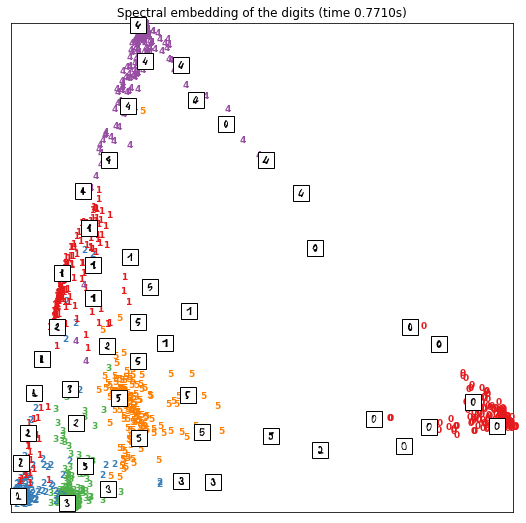

In [19]:
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se, '11',
               "Spectral embedding of the digits (time %0.4fs)" % (time() - t0))

## Part R - t-SNE embedding of the digits dataset

Computing t-SNE embedding
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


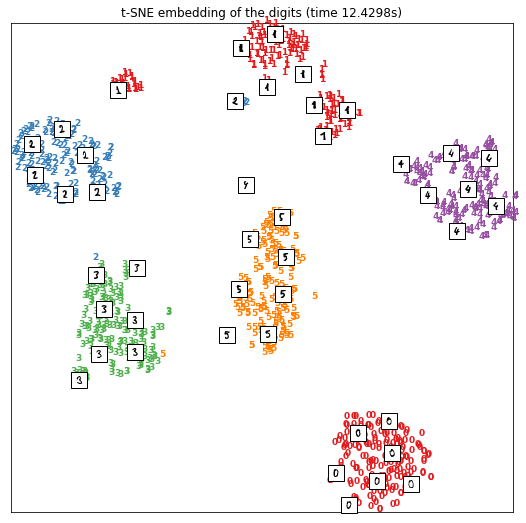

In [20]:
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, '12',
               "t-SNE embedding of the digits (time %0.4fs)" % (time() - t0))

In [21]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-08 13:34:04.422142
